In [1]:
#We need to import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re


In [2]:
# We need to read the dataset into a Pandas DataFrame
df = pd.read_csv('QVI_transaction_data.csv')
dw = pd.read_csv('QVI_purchase_behaviour.csv')
print(df)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chi

In [3]:
# We need to read the dataset into a Pandas DataFrame
dw = pd.read_csv('QVI_purchase_behaviour.csv')
print(dw)

       LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]


In [4]:
# Exploratory data analysis 
#The first step in any analysis is to first understand the data. Let's take a look at each of the datasets provided.
print(df.info())
print(dw.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object

In [5]:
# Display Data Types and Missing Values: Check the data types of each column and identify missing values:
print(df.info())
print(df.isnull().sum())

#We can see from above that there are no missing data, null data and the data types are accurate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [6]:
# Display Data Types and Missing Values: Check the data types of each column and identify missing values:
print(dw.info())
print(dw.isnull().sum())
#We can see from above that there are no missing data, null data and the data types are accurate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [7]:
# We can see that the date column is in an integer format. Let's change this to a date format.
# Step 1: Convert the 'Joining_Date' column to a string
#df['DATE'] = df['DATE'].astype(str)

# Step 2: Convert the string to datetime format using pd.to_datetime
df['DATE'] = pd.to_datetime(df['DATE'], origin='1899-12-30', unit='D')

# Check the result
print(df)



             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [8]:
#We should check that we are looking at the right products by examining PROD_NAME

# Step 1: Load the dataset
print(df)

# Step 2: Check for null or missing values in the PROD_NAME column
missing_values = df['PROD_NAME'].isnull().sum()
print(f"Missing values in 'PROD_NAME': {missing_values}")

# Step 3: Count the total number of products
total_products = df['PROD_NAME'].count()
print(f"Total number of products: {total_products}")

# Step 4: Count the number of unique product names
unique_product_count = df['PROD_NAME'].nunique()
print(f"Number of unique product names: {unique_product_count}")

# Step 5: Find the most frequent product names
most_frequent_products = df['PROD_NAME'].value_counts().head(10)
print("\nMost frequent products:\n", most_frequent_products)

# Step 6: Basic descriptive stats (if needed)
prod_name_description = df['PROD_NAME'].describe()
print("\nBasic description of 'PROD_NAME':\n", prod_name_description)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [9]:
# We should check that we are looking at the right products by examining PROD_NAME. 
# Let us generate a summary of the PROD_NAME column.

# Step 1: Load the dataset
print(df)

# Step 2: Tokenize the product names into individual words
# Convert product names to lowercase and split by spaces
product_words = df['PROD_NAME'].str.lower().str.split()
print(product_words)

# Step 3: Flatten the list of lists into a single list of words
all_words = [word for product in product_words for word in product]

# Step 4: Count the frequency of each word
word_counts = Counter(all_words)

# Step 5: Get the most common words (top 20)
most_common_words = word_counts.most_common(20)

# Output the most common words
most_common_words



             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

[('175g', 60561),
 ('chips', 49770),
 ('150g', 43131),
 ('kettle', 41288),
 ('&', 35565),
 ('smiths', 28860),
 ('salt', 27976),
 ('cheese', 27890),
 ('pringles', 25102),
 ('134g', 25102),
 ('doritos', 24962),
 ('crinkle', 23960),
 ('110g', 22387),
 ('corn', 22063),
 ('original', 21560),
 ('cut', 20754),
 ('chip', 18645),
 ('170g', 18502),
 ('salsa', 18094),
 ('chicken', 15407)]

In [10]:
# Looks like we are definitely looking at potato chips but how can we check that these are all chips?
# We can do some basic text analysis by summarising the individual words in the product name.

# Step 1: Load the dataset
print(df)

# Step 2: Define keywords that indicate a product is a chip
chip_keywords = ['chips', 'crisps', 'potato']

# Step 3: Create a function to check if a product name contains any chip keywords
def is_chip_product(prod_name):
    # Convert product name to lowercase and split by spaces
    words = prod_name.lower().split()
    # Check if any chip keyword is in the product name
    return any(keyword in words for keyword in chip_keywords)

# Step 4: Apply the function to the PROD_NAME column and create a new column to flag non-chip products
df['is_chip_product'] = df['PROD_NAME'].apply(is_chip_product)

# Step 5: Filter out products that are not chips
non_chip_products = df[~df['is_chip_product']]

# Step 6: Display non-chip products
print("Non-chip products:\n", non_chip_products[['PROD_NAME']])

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [11]:
# Step 1: Load the dataset
print(df)

# Step 2: Tokenize the product names into individual words
# Convert product names to lowercase and split by spaces
product_words = df['PROD_NAME'].str.lower().str.split()

# Step 3: Flatten the list of lists into a single list of words
all_words = [word for product in product_words for word in product]

# Step 4: Define a function to remove words with digits or special characters
def is_clean_word(word):
    # Remove words that contain digits or special characters using regex
    return re.match("^[a-zA-Z]+$", word)

# Step 5: Filter the list of words to keep only alphabetic words
clean_words = [word for word in all_words if is_clean_word(word)]

# Step 6: Count the frequency of each word
word_counts = Counter(clean_words)

# Step 7: Sort the words by frequency of occurrence
sorted_word_counts = word_counts.most_common()

# Step 8: Display the top 20 most frequent clean words
print(sorted_word_counts[:20])


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [12]:
# There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.

# Step 1: Filter out products that contain the word 'salsa' in the product name
df_chips = df[~df['PROD_NAME'].str.contains('salsa', case=False, na=False)]

# Step 2: Check the result
print(df_chips['PROD_NAME'].unique())  # To see the remaining product names

print(df_chips)
# Optional: Save the cleaned dataset (if needed)
df_chips.to_csv('C:/Users/USER/Documents/Data Science/Quantium Project/cleaned_chips_data.csv', index=False)


['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Thins Chips         Originl saltd 175g'
 'Red Rock De

In [13]:
# Next, we can use `summary()` to check summary statistics such as mean, min and max values 
#for each feature to see if there are any obvious outliers in the data 
#and if there are any nulls in any of the columns (`NA's : number of nulls`will appear in the output if there are any nulls).
# Load your dataset (assuming it's already in a DataFrame named df_chips)
print (df_chips)

# Step 1: Summary statistics for numeric columns
summary_stats = df_chips.describe()

# Step 2: Check for null values (number of nulls in each column)
null_values = df_chips.isnull().sum()

# Step 3: Display results
print("Summary Statistics:\n", summary_stats)
print("\nNumber of Null Values in Each Column:\n", null_values)


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [14]:
#There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. 
#Let's investigate further the case where 200 packets of chips are bought in one transaction.

# Step 1: Filter the dataset to find transactions where the product quantity (PROD_QTY) is 200
outlier_transactions = df[df['PROD_QTY'] == 200]

# Step 2: Display the transactions with 200 packets bought
print(outlier_transactions)

# Step 3: Check for other details such as transaction date, customer details, and store details if needed
# For example, checking the unique customer IDs or stores involved in these transactions
unique_customers = outlier_transactions['LYLTY_CARD_NBR'].unique()
unique_stores = outlier_transactions['STORE_NBR'].unique()

print(f"Unique Customers Involved: {unique_customers}")
print(f"Unique Stores Involved: {unique_stores}")


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  is_chip_product  
69762  Dorito Corn Chp     Supreme 380g       200      650.0            False  
69763  Dorito Corn Chp     Supreme 380g       200      650.0            False  
Unique Customers Involved: [226000]
Unique Stores Involved: [226]


In [15]:
# Let's see if the customer has had other transactions

# Step 1: Identify the customer(s) who made the transaction with 200 packets
outlier_transactions = df_chips[df_chips['PROD_QTY'] == 200]
customer_ids = outlier_transactions['LYLTY_CARD_NBR'].unique()

# Step 2: Filter the dataset for all transactions made by the identified customer(s)
customer_transactions = df_chips[df_chips['LYLTY_CARD_NBR'].isin(customer_ids)]

# Step 3: Display the customer's transactions
print(customer_transactions)

# Optional: Analyze further, like seeing unique products or quantities bought by the customer
unique_products = customer_transactions['PROD_NAME'].unique()
print(f"Unique products bought by the customer: {unique_products}")


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  is_chip_product  
69762  Dorito Corn Chp     Supreme 380g       200      650.0            False  
69763  Dorito Corn Chp     Supreme 380g       200      650.0            False  
Unique products bought by the customer: ['Dorito Corn Chp     Supreme 380g']


In [16]:
#It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. 
#The customer might be buying chips for commercial purposes instead. 
#We'll remove this loyalty card number from further analysis.

# Step 1: Identify the customer to be removed (loyalty card number)
LYLTY_CARD_NBR_to_remove = 226000  

# Step 2: Filter the dataset to exclude the customer
df_filtered = df_chips[df_chips['LYLTY_CARD_NBR'] != LYLTY_CARD_NBR_to_remove]

# Step 3: Save the updated dataset
df_filtered.to_csv('filtered_dataset.csv', index=False)

# Step 4: Check the result
print(f"Customer {LYLTY_CARD_NBR_to_remove} removed from the dataset.")
print(df_filtered.head())  # Display the first few rows to verify

# Save the filtered dataset 
df_filtered.to_csv('C:/Users/USER/Documents/Data Science/Quantium Project/filtered_dataset.csv', index=False)


Customer 226000 removed from the dataset.
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

   is_chip_product  
0            False  
1            False  
2             True  
3            False  
4            False  


In [17]:
# Let us Re-examine transaction data
print(df_filtered.info())

print(df_filtered.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DATE             246740 non-null  datetime64[ns]
 1   STORE_NBR        246740 non-null  int64         
 2   LYLTY_CARD_NBR   246740 non-null  int64         
 3   TXN_ID           246740 non-null  int64         
 4   PROD_NBR         246740 non-null  int64         
 5   PROD_NAME        246740 non-null  object        
 6   PROD_QTY         246740 non-null  int64         
 7   TOT_SALES        246740 non-null  float64       
 8   is_chip_product  246740 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 17.2+ MB
None
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303

In [18]:
# That's better. Now, let's look at the number of transaction lines over time to see if there are any obvious data issues 
# such as missing data.

# Step 1: Ensure the 'DATE' column is in datetime format
#df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Step 2: Group the dataset by the date and count the number of transactions for each day
transactions_per_day = df_filtered.groupby(df_filtered['DATE'].dt.date).size().reset_index(name='Transaction_Count')

# Step 3: Display the result
print(transactions_per_day)


           DATE  Transaction_Count
0    2018-07-01                663
1    2018-07-02                650
2    2018-07-03                674
3    2018-07-04                669
4    2018-07-05                660
..          ...                ...
359  2019-06-26                657
360  2019-06-27                669
361  2019-06-28                673
362  2019-06-29                703
363  2019-06-30                704

[364 rows x 2 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_19504\2940593059.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'], errors='coerce')


Missing Dates:
177   2018-12-25
Name: DATE, dtype: datetime64[ns]


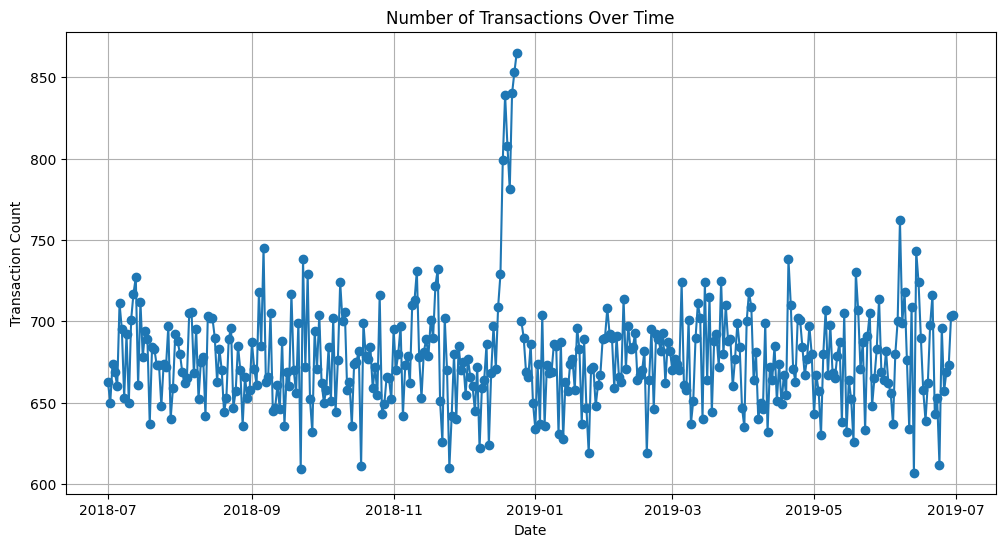

In [19]:
# There's only 364 rows, meaning only 364 dates which indicates a missing date. 
# Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions 
#over time to find the missing date.

# Step 1: Create a date range from 1st July 2018 to 30th June 2019
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

# Step 2: Ensure the 'DATE' column in the dataset is in datetime format
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'], errors='coerce')

# Step 3: Count the number of transactions per date
transactions_per_day = df_filtered.groupby(df_filtered['DATE'].dt.date).size().reset_index(name='Transaction_Count')

# Step 4: Convert the 'DATE' column back to datetime for merging
transactions_per_day['DATE'] = pd.to_datetime(transactions_per_day['DATE'])

# Step 5: Merge the full date range with the transaction data to find missing dates
full_date_df = pd.DataFrame(date_range, columns=['DATE'])
merged_df = pd.merge(full_date_df, transactions_per_day, on='DATE', how='left')

# Step 6: Identify the missing dates
missing_dates = merged_df[merged_df['Transaction_Count'].isnull()]['DATE']
print(f"Missing Dates:\n{missing_dates}")

# Step 7: Plot the number of transactions over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['DATE'], merged_df['Transaction_Count'], label='Number of Transactions', marker='o')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()


In [19]:
# We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.
print (merged_df)

# Step 1: Filter the dataset for December 2018 to early January 2019
december_data = merged_df[(merged_df['DATE'] >= '2018-12-01') & (merged_df['DATE'] <= '2019-01-15')]

# Step 2: Plot the number of transactions over time for December 2018 and early January 2019
plt.figure(figsize=(12, 6))
plt.plot(december_data['DATE'], december_data['Transaction_Count'], label='Number of Transactions', marker='o', color='blue')
plt.title('Number of Transactions in December 2018 and Early January 2019')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




NameError: name 'merged_df' is not defined

In [20]:
# We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. 
#This is due to shops being closed on Christmas day. Now that we are satisfied that the data no longer has outliers, 
# we can move on to creating other features such as brand of chips or pack size from PROD_NAME. We will start with pack size.
# firstly let us reload the latest filtered dataset. 
df_new = pd.read_csv('filtered_dataset.csv')
print(df_new)

# Step 1: Extract pack size using regular expression (looks for numbers followed by 'g')
df_new['PACK_SIZE'] = df_new['PROD_NAME'].str.extract(r'(\d+)(?=g)', expand=False).astype(float)

# Step 2: Check the result
print(df_new[['PROD_NAME', 'PACK_SIZE']].head())

# Save the pack size dataset 
df_new['PACK_SIZE'].to_csv('C:/Users/USER/Documents/Data Science/Quantium Project/packsize_dataset.csv', index=False)


              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       2018-10-17          1            1000       1         5   
1       2019-05-14          1            1307     348        66   
2       2019-05-20          1            1343     383        61   
3       2018-08-17          2            2373     974        69   
4       2018-08-18          2            2426    1038       108   
...            ...        ...             ...     ...       ...   
246735  2019-03-09        272          272319  270088        89   
246736  2018-08-13        272          272358  270154        74   
246737  2018-11-06        272          272379  270187        51   
246738  2018-12-27        272          272379  270188        42   
246739  2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g 

In [21]:
#  Let's check if the pack sizes look sensible 

# Step 1: Summary statistics for the 'PACK_SIZE' column
pack_size_summary = df_new['PACK_SIZE'].describe()

# Step 2: Check for unique values in 'PACK_SIZE'
unique_pack_sizes = df_new['PACK_SIZE'].unique()

# Step 3: Identify potential outliers by checking for extreme values
outlier_pack_sizes = df_new[df_new['PACK_SIZE'] > 1000]  # Adjust threshold if necessary

# Step 4: Display the results
print("Pack Size Summary:\n", pack_size_summary)
print("\nUnique Pack Sizes:\n", unique_pack_sizes)
print("\nPotential Outlier Pack Sizes:\n", outlier_pack_sizes[['PROD_NAME', 'PACK_SIZE']])


Pack Size Summary:
 count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

Unique Pack Sizes:
 [175. 170. 150. 330. 210.  nan 270. 220. 125. 110. 134. 380. 180. 165.
 135. 250. 200. 160. 190.  90.  70.]

Potential Outlier Pack Sizes:
 Empty DataFrame
Columns: [PROD_NAME, PACK_SIZE]
Index: []


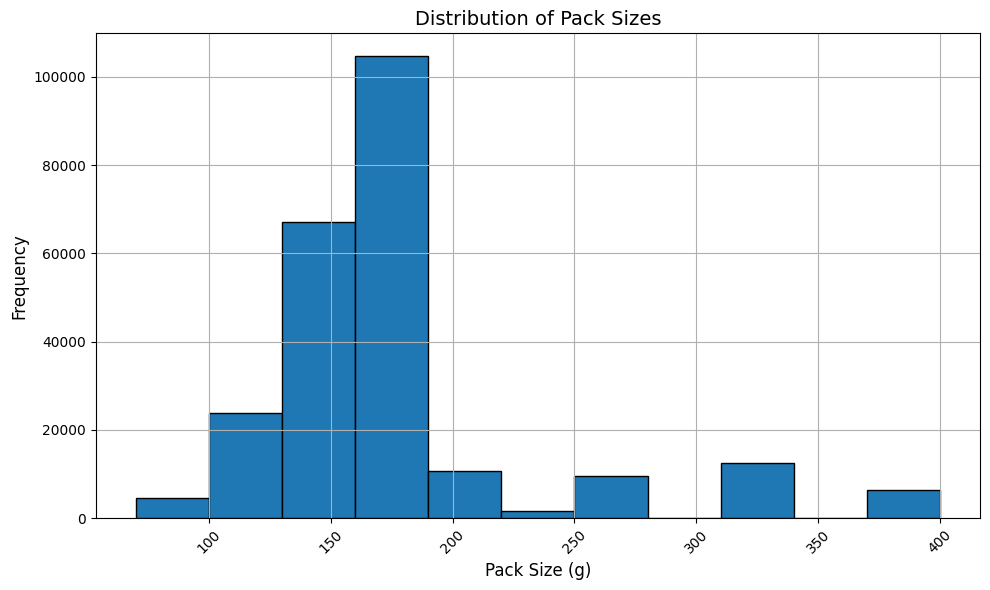

In [22]:
# The largest size is 380g and the smallest size is 70g - seems sensible!

# Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable 
# and not a continuous variable even though it is numeric.

# Step 1: Drop NaN values from PACK_SIZE for the purpose of the plot
df_cleaned = df_new.dropna(subset=['PACK_SIZE'])

# Step 2: Plot histogram of PACK_SIZE
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['PACK_SIZE'], bins=range(int(df_cleaned['PACK_SIZE'].min()), int(df_cleaned['PACK_SIZE'].max()) + 30, 30), edgecolor='black')

# Step 3: Customize the plot
plt.title('Distribution of Pack Sizes', fontsize=14)
plt.xlabel('Pack Size (g)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Step 4: Show the plot
plt.show()


In [23]:
# Function to extract the first two words (brand)
def extract_brand(prod_name):
    # Use regex to capture the first two words
    match = re.match(r'^(\w+\s\w+)', prod_name)
    if match:
        return match.group(0)
    return None


# Apply the function to your dataframe
df['BRAND'] = df_new['PROD_NAME'].apply(extract_brand)

# View the updated dataframe
df[['PROD_NAME', 'BRAND']].head(93)


,PROD_NAME,BRAND
0,Natural Chip Compny SeaSalt175g,Natural Chip
1,CCs Nacho Cheese 175g,CCs Nacho
2,Smiths Crinkle Cut Chips Chicken 170g,Smiths Crinkle
3,Smiths Chip Thinly S/Cream&Onion 175g,Smiths Chip
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle Tortilla
...,...,...
88,Doritos Corn Chips Cheese Supreme 170g,Doritos Mexicana
89,Pringles Original Crisps 134g,Thins Potato
90,Kettle Chilli 175g,Cobs Popd
91,Kettle Original 175g,WW Crinkle


In [ ]:
# Pack sizes created look reasonable. 
# Now to create brands, we can use the first word in PROD_NAME to work out the brand name...

# Step 1: Extract the first word from PROD_NAME to get the brand name
df['BRAND'] = df_new['PROD_NAME'].str.split(' ').str[0]

# Step 2: Check the result by displaying the first few rows
print(df[['PROD_NAME', 'BRAND']].head())

#Over to you! Check the results look reasonable.  

# Display the first few rows of the DataFrame to check the extracted brands
print(df[['PROD_NAME', 'BRAND']].head(10))

# Check the unique brands to ensure they're being extracted correctly
unique_brands = df['BRAND'].unique()
print("Unique brands extracted: ", unique_brands)

# Count the number of unique brands to see how many distinct ones there are
print("Number of unique brands: ", len(unique_brands))


In [ ]:
### Some of the brand names look like they are of the same brands - 
# such as RED and RRD, which are both Red Rock Deli chips. Let's combine these together.

# Replace a portion of words in 'prod_name' column (e.g., replace 'RRD' with 'Red Rock Deli')
df_new['PROD_NAME'] = df_new['PROD_NAME'].str.replace('RRD', 'Red Rock Deli') 

# Display updated DataFrame
df_new['PROD_NAME'].head(86)
df_new.head(85)vv.
0.                          

# Save the updated dataset 
df_new.to_csv('C:/Users/USER/Documents/Data Science/Quantium Project/cleaned_transaction_dataset.csv', index=False)

# To check for outliers
sns.boxplot(df['PROD_QTY'])

In [6]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [7]:
dw.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [8]:
#Let us use z-score method to remove outliers
#let us find the limits first
upper_limit = df['PROD_QTY'].mean() + 5*df['PROD_QTY'].std()
lower_limit = df['PROD_QTY'].mean() - 5*df['PROD_QTY'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 5.125578619102677
lower limit: -1.3109612710080063


In [9]:
#find the outliers
df.loc[(df['PROD_QTY'] > upper_limit) | (df['PROD_QTY'] < lower_limit)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,8/19/2018,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,5/20/2019,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [10]:
#trimming out the outliers
outliers = df.loc[(df['PROD_QTY'] > upper_limit) | (df['PROD_QTY'] < lower_limit)]
print ('old data:', len(df))
print ('outliers:', len(outliers))

print ('new data after removing outliers', len(df)-len(outliers))

old data: 264836
outliers: 2
new data after removing outliers 264834


In [11]:
#Print the new dataset without outliers
df_new = df[(df['PROD_QTY'] >= lower_limit) & (df['PROD_QTY'] <= upper_limit)]
#df.loc[(df['PROD_QTY'] >= upper_limit) | (df['PROD_QTY'] <= lower_limit)]
print (df_new)

#After trimming out the outliers, the total data rows were 264,834; which is also the same number of rows after printing the dataset without outliers.

              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       10/17/2018          1            1000       1         5   
1        5/14/2019          1            1307     348        66   
2        5/20/2019          1            1343     383        61   
3        8/17/2018          2            2373     974        69   
4        8/18/2018          2            2426    1038       108   
...            ...        ...             ...     ...       ...   
264831    3/9/2019        272          272319  270088        89   
264832   8/13/2018        272          272358  270154        74   
264833   11/6/2018        272          272379  270187        51   
264834  12/27/2018        272          272379  270188        42   
264835   9/22/2018        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g   

In [12]:
# Let us check for Duplicates: Find and display duplicate rows:
duplicates = df_new[df_new.duplicated()]
print(duplicates)
#After carefully inspecting the data, the supposed duplicate value is the loyalty card number'107024', 
#however its not a duplicate value but different transactions by a particular customer.

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124845  10/1/2018        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  
124845  Smiths Thinly Cut   Roast Chicken 175g         2        6.0  


In [13]:
# Let us check for Duplicates: Find and display duplicate rows:
duplicates = dw[dw.duplicated()]
print(duplicates)

#As seen below, there are no duplicate data.

Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [14]:
# Check for null values
null_values = df_new.isnull()
print("Null Values in the DataFrame:")
print(null_values)

#These shows there are no null value in the dataset

Null Values in the DataFrame:
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  \
0       False      False           False   False     False      False   
1       False      False           False   False     False      False   
2       False      False           False   False     False      False   
3       False      False           False   False     False      False   
4       False      False           False   False     False      False   
...       ...        ...             ...     ...       ...        ...   
264831  False      False           False   False     False      False   
264832  False      False           False   False     False      False   
264833  False      False           False   False     False      False   
264834  False      False           False   False     False      False   
264835  False      False           False   False     False      False   

        PROD_QTY  TOT_SALES  
0          False      False  
1          False      False  
2  

In [15]:
# Check for null values
null_values = dw.isnull()
print("Null Values in the DataFrame:")
print(null_values)
#These shows there are no null value in the dataset

Null Values in the DataFrame:
       LYLTY_CARD_NBR  LIFESTAGE  PREMIUM_CUSTOMER
0               False      False             False
1               False      False             False
2               False      False             False
3               False      False             False
4               False      False             False
...               ...        ...               ...
72632           False      False             False
72633           False      False             False
72634           False      False             False
72635           False      False             False
72636           False      False             False

[72637 rows x 3 columns]


In [16]:
# Save the cleaned and renamed DataFrame to an Excel file
df_new.to_excel("df_new.xlsx", index=False)  # 'index=False' prevents saving the index as a separate column

print("File saved successfully.")

File saved successfully.


In [17]:
df_new.to_excel(r'C:\Users\USER\Documents\Data Science\Quantium Project\df_new.xlsx', index=False)
